In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [65]:
n = 20
d = 5
x = np.random.rand(n, d) * 10
x

array([[3.67774306, 1.53226293, 4.35545252, 0.37182823, 9.96772682],
       [4.51492152, 1.94289081, 8.37737536, 3.14376332, 3.88305058],
       [8.15539316, 7.20351146, 3.06965482, 6.40062647, 3.34785114],
       [2.97126088, 8.31706494, 1.77877365, 2.10811138, 9.11715622],
       [2.88169154, 5.3351034 , 3.1918392 , 2.44288217, 9.44676226],
       [1.82791661, 0.93840259, 6.74979475, 9.90138449, 6.80989475],
       [2.59493199, 5.74684736, 3.6600407 , 9.54204432, 6.74880044],
       [3.93303832, 3.7587955 , 5.96301759, 7.09823428, 3.08287749],
       [4.67749251, 6.61576891, 2.70000372, 6.8701066 , 1.77260151],
       [9.41873427, 8.61622733, 7.49972624, 1.74074479, 1.08063531],
       [5.5407647 , 7.54908551, 7.16660009, 5.81234656, 1.98264691],
       [7.51201773, 6.42423306, 8.76534671, 6.20701446, 9.59008249],
       [0.92270073, 1.9976297 , 4.6484717 , 1.75400625, 3.56051587],
       [9.86542332, 5.80727775, 0.09848198, 9.44578174, 6.76331316],
       [0.81431642, 3.03244823, 7.

In [66]:
y = 5 * x[:, 0] - 2 * x[:, 1] + 3 * x[:, 2] - 1.5 * x[:, 3] + 1.25 * x[:, 4]
y

array([40.29246315, 43.95912033, 30.16278154, 11.79277369, 21.45789804,
       21.17245381,  6.58402141, 23.24289882, 10.16652789, 51.10007236,
       27.86524154, 53.68474411, 16.38329482, 32.29347587, 19.18043145,
       49.15231616, 39.11683451, 13.79570291, 34.65247601, 16.52975164])

In [67]:
y.shape

(20,)

In [51]:
mu, sigma = 0, 0.01 # mean and standard deviation
x_noise = np.random.normal(mu, sigma, size=(n, d))

y_noise = np.random.normal(mu, sigma, size=(n, 1))


In [68]:
y_noise.shape

(20, 1)

In [69]:
y = y + y_noise
y.shape

(20, 20)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [53]:
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

-0.0890602826539503


In [57]:
y_pred = model.predict(X_test)
result = mean_squared_error(y_test, y_pred)
result

0.014771757402638872

In [62]:
y_test.shape

(5, 20)

ValueError: x and y must be the same size

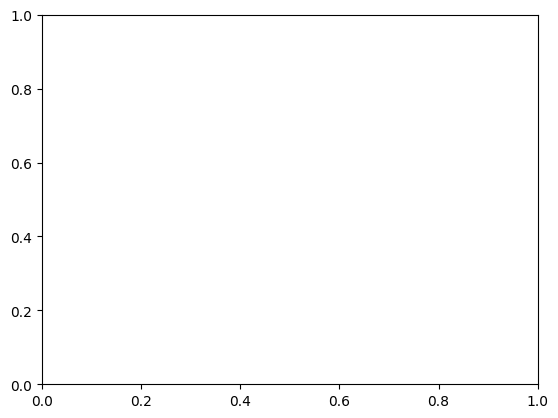

In [61]:
plt.scatter(X_test[1, :], y_test, color ='b')
plt.scatter(X_test[1, :], y_pred, color ='y')

plt.show()

## Finding used features

In [43]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'], random_state=263)
lasso = Lasso().fit(X_train, y_train)

print([names[i] for i in range(len(names)) if lasso.coef_[i] != 0])

['bmi', 's5']


## Central model for argmaxk

In [66]:
x, y = data[: - 1], data[-1]
x = np.array(x)

In [70]:
x_sum = x.sum(axis=0)
print(x_sum)

[1.82839551e+03 5.75000000e+03 5.62328000e+03 3.50000000e+01
 2.80102700e+02 3.17399500e+03 3.46181000e+04 1.91778660e+03
 4.83100000e+03 2.06295000e+05 9.31750000e+03 1.80080160e+05
 6.39457000e+03 1.13897000e+04]


In [73]:
k = 3
d = x.shape[1]

max_val = x_sum.max()
index_zeroed = []
for i in range(d - k):
    index = x_sum.argmin()
    index_zeroed.append(index)
    x_sum[index] = max_val # to avoid being found as min in the next interation
    
for i in index_zeroed:
    x_sum[i] = 0

In [75]:
x_sum # kept the k largest values, and the other were made zero

array([     0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
        34618.1 ,      0.  ,      0.  , 206295.  ,      0.  , 180080.16,
            0.  ,      0.  ])